# Classification model using Logistic Regression

### 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [4]:
path ="../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_bin.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,428,429,430,431,432,433,434,435,436,437
0,1,-0.017791,-0.245300,0.463568,-0.517827,-0.355514,0.487726,0.482991,-0.339176,0.662390,...,-0.625847,0.461229,-0.598586,0.767162,0.414474,0.245944,-0.989470,-0.252575,0.261593,0.291109
1,0,0.110768,0.574821,0.105035,-0.470658,-1.425475,0.535306,0.419043,0.163311,0.275816,...,-0.661165,-0.380656,0.244910,0.683573,-0.592842,0.038613,0.628091,-0.130931,-0.041118,-0.899655
2,1,0.001459,0.880947,-0.013048,-0.862418,-1.298104,0.784262,-0.053569,-0.193600,0.001717,...,-0.642589,-0.474344,0.428170,0.699182,-0.055734,0.590347,0.470508,-0.353349,-0.053301,-0.224115
3,0,0.062937,0.368952,-0.551430,0.313969,0.537392,-0.051345,-0.128191,-0.052663,0.022732,...,0.170213,-0.524737,0.457968,-0.350422,-0.153530,0.009347,-0.301081,-0.300408,0.130717,-0.096597
4,1,0.207857,0.284800,0.107111,-0.556411,-1.325310,0.267002,0.502943,-0.133496,0.225408,...,-0.396248,-0.215058,-0.150988,0.429753,-0.210586,0.285608,0.605913,-0.250192,0.251523,-0.497216


In [5]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0   -0.017791 -0.245300  0.463568 -0.517827 -0.355514  0.487726  0.482991   
1    0.110768  0.574821  0.105035 -0.470658 -1.425475  0.535306  0.419043   
2    0.001459  0.880947 -0.013048 -0.862418 -1.298104  0.784262 -0.053569   
3    0.062937  0.368952 -0.551430  0.313969  0.537392 -0.051345 -0.128191   
4    0.207857  0.284800  0.107111 -0.556411 -1.325310  0.267002  0.502943   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.097058  0.170209  0.076273 -0.483340 -0.977704  0.420521  0.228634   
177 -0.155079 -0.147931 -0.948970 -0.418657  0.217772 -0.511356 -0.288000   
178 -0.281101  0.346973  0.178181 -0.358279 -0.779175  0.444296 -0.073569   
179  0.006101  0.110437  0.175757 -0.590025 -0.952412  0.304226  0.129646   
180  0.413711  0.760893  0.515536 -0.342198 -0.715016  0.434291 -0.205907   

            7         8         9  ...       428       429       430  \
0  

### 3. Train-Test dataset split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_train))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 144


### 4. Select the parameters of the model and fit it

In [7]:
param_grid = {'C': [1,2,5,7,10],
            'max_iter':[1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10], 'max_iter': [1000000],
                         'random_state': [125]})

In [8]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=1000000, random_state=125)

In [9]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5283251231527093


In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0
y_train=y_train.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0
y_test=y_test.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [12]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:0.8125
Final accuracy on the testing dataset: 0.7027027027027027


In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[56 14]
 [13 61]]
Input data:  [1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1]
Prediction:        [1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1]


In [14]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        70
           1       0.81      0.82      0.82        74

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.81       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[11  4]
 [ 7 15]]
Input data:  [1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1]
Prediction:        [1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1]


In [16]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.79      0.68      0.73        22

    accuracy                           0.70        37
   macro avg       0.70      0.71      0.70        37
weighted avg       0.72      0.70      0.71        37



### 7. Results visualizaton

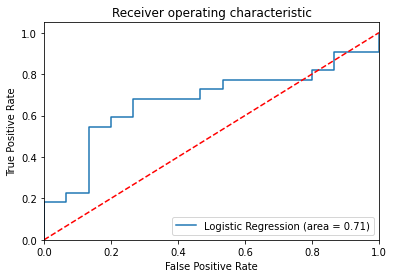

In [17]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()